In [67]:
import pandas as pd             # importing pandas library
import matplotlib.pyplot as plt # importing matplotlib library
from sklearn.model_selection import train_test_split # importing train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree   
from sklearn.metrics import accuracy_score # importing accuracy_score

In [68]:
df = pd.read_csv('diabetes.csv' )               # reading the csv file
df.head()                                       # displaying the top 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df.tail()                       # displaying the last 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [70]:
df.shape                    # displaying the number of rows and columns

(768, 9)

In [71]:
df.info()               # displaying the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [72]:
df.isnull().sum()                       # checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
duplicate_rows_df = df[df.duplicated()]                 #used to know the duplicate rows
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [74]:
df = df.drop(['SkinThickness'], axis=1)            #dropping the unnecessary columns
df.head(5)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [75]:
# Rename the columns
df = df.rename(columns={
    'Pregnancies': 'Num_Pregnancies',
    'Glucose': 'Plasma_Glucose',
    'BloodPressure': 'Blood_Pressure',
    'Insulin': 'Serum_Insulin',
    'DiabetesPedigreeFunction': 'Pedigree_Function',
    'Age': 'Patient_Age',
    'Outcome': 'Diabetes_Outcome'
})

# Display the first 5 rows with the renamed columns
df.head(5)

,Num_Pregnancies,Plasma_Glucose,Blood_Pressure,Serum_Insulin,BMI,Pedigree_Function,Patient_Age,Diabetes_Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


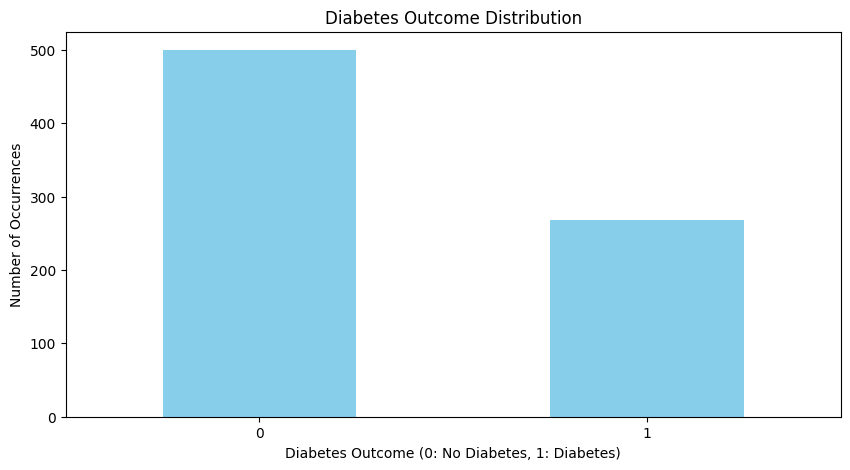

In [76]:
# Bar chart for 'Diabetes_Outcome' column
df['Diabetes_Outcome'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Diabetes Outcome Distribution")
plt.ylabel('Number of Occurrences')
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

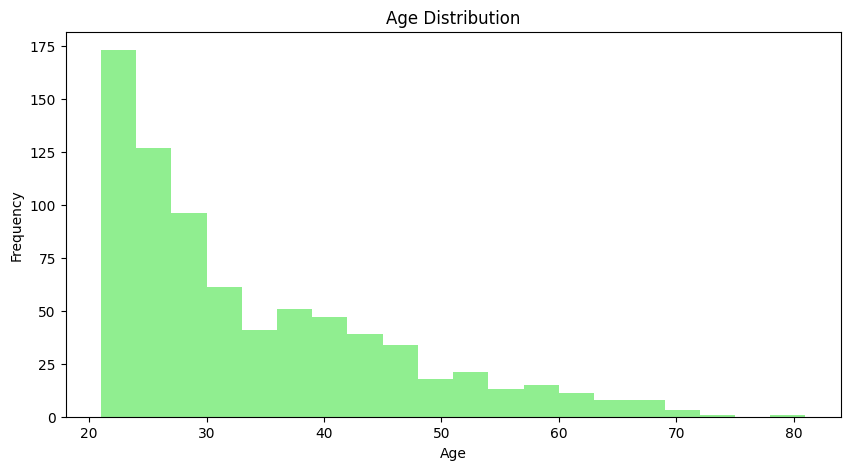

In [77]:
# Bar chart for 'Age' column
df['Patient_Age'].plot(kind='hist', bins=20, figsize=(10, 5), color='lightgreen')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

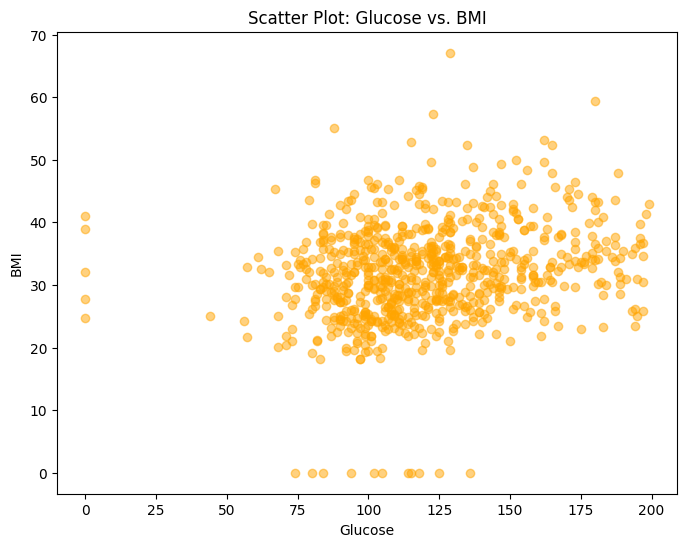

In [78]:
# Scatter plot for 'Glucose' vs. 'BMI'
plt.figure(figsize=(8, 6))
plt.scatter(df['Plasma_Glucose'], df['BMI'], alpha=0.5, color='orange')
plt.title("Scatter Plot: Glucose vs. BMI")
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


In [79]:
# Store the feature matrix X and response vector y

x=df.drop('Diabetes_Outcome',axis=1)
y = df['Diabetes_Outcome']

In [80]:
# Splitting the dataset into training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [81]:
# Training the model
dt = DecisionTreeRegressor() 
dt.fit(x_train,y_train)

DecisionTreeRegressor()

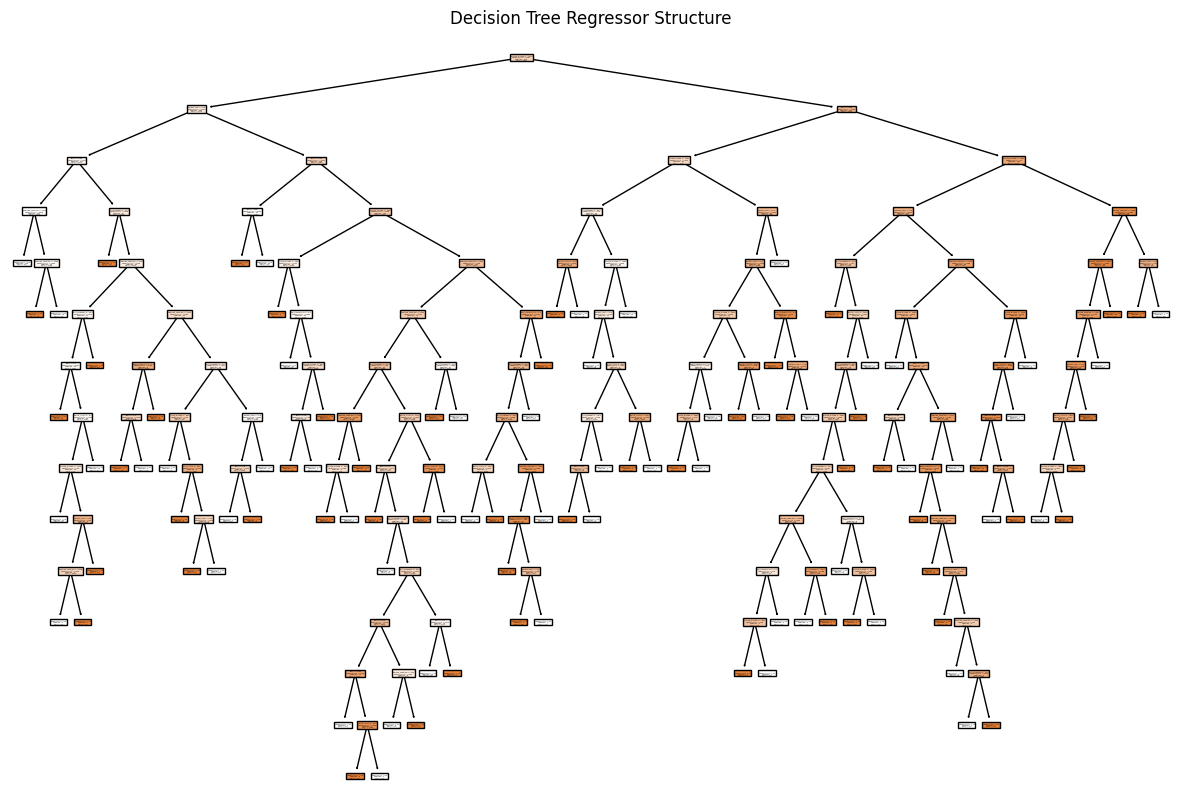

In [82]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=x.columns.tolist())
plt.title("Decision Tree Regressor Structure")
plt.show()

In [83]:
# Testing the model
y_pred=dt.predict(x_test)

In [84]:
# Accuracy of the model
print(accuracy_score(y_test,y_pred))

0.7597402597402597
